<a href="https://colab.research.google.com/github/MJLee25/app_trial/blob/main/%5BEDA_%EC%B6%94%EA%B0%80%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd
import shapely.geometry
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from shapely import wkt
from shapely.ops import unary_union
from shapely.wkt import loads
from shapely.geometry import Point, Polygon
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import statsmodels.api as sm

In [ ]:
# 드라이브와 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/빅콘_다시/데이터/차원축소/[vif_result추가데이터]unscaled_train.csv")
train = pd.DataFrame(train)
train.head()

,gfa_dlt,land_area,floor_gr,floor_bm,year_con,교통_도보접근시간,학교_차량접근시간,교통_차량접근시간,학교_대중교통접근시간,병원_대중교통접근시간,...,add_dong,geometry,bld_type,EMD_CD,key,price_tr,의료,성비,총인구,GRDP
0,27202.05,3602.0,12.0,4.0,1985.0,3.917742,0.823476,17.158817,10.572581,12.580645,...,여의도동,POLYGON ((948901.6666324371 1949279.7103949625...,집합,11560110,1,14600,365785,0.500753,382352,28194672
1,3516.43,713.6,7.0,2.0,2004.0,4.275025,1.127415,21.029943,13.713139,10.803410,...,논현동,POLYGON ((959462.1692613533 1946535.4616427755...,일반,11680108,2,8100,540623,0.479606,578114,57487436
2,25984.49,2705.0,17.0,4.0,1995.0,4.102086,0.316556,18.921771,8.910538,10.889133,...,충정로3가,POLYGON ((952385.8893198308 1951907.4372649118...,일반,11410102,3,13900,285266,0.487596,310376,7195459
3,31894.78,3772.0,17.0,4.0,1987.0,4.102086,0.316556,18.921771,8.910538,10.889133,...,충정로3가,POLYGON ((952385.8893198308 1951907.4372649118...,집합,11410102,4,10500,285266,0.487596,310376,7195459
4,4370.31,730.5,5.0,4.0,2012.0,4.704024,1.726482,19.674376,13.085201,10.418577,...,한남동,POLYGON ((956238.2713397081 1950166.6098483382...,일반,11170131,5,25200,213789,0.485601,235951,9686230


In [ ]:
seoul = gpd.read_file('/content/drive/MyDrive/빅콘2024/데이터/법정동_shp파일/구역의도형_전체분_서울특별시_2023년6월/11000/TL_SCCO_EMD.shp', encoding='cp949')
gyeongi = gpd.read_file('/content/drive/MyDrive/빅콘2024/데이터/법정동_shp파일/구역의도형_전체분_경기도_2023년6월/41000/TL_SCCO_EMD.shp', encoding='cp949')
seoul.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.19 19..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."


In [ ]:
bundang = gyeongi[gyeongi["EMD_CD"].str.startswith('41135')]
bundang

In [ ]:
map = pd.concat([seoul, bundang])
map

In [ ]:
train["EMD_CD"] = train["EMD_CD"].astype(str)
map["EMD_CD"] = map["EMD_CD"].astype(str)

In [ ]:
set(train["EMD_CD"]) - set(map["EMD_CD"])

set()

In [ ]:
train.drop(['geometry'],axis=1, inplace=True)

In [ ]:
train2 = pd.merge(train, map, on = "EMD_CD", how='left')
train2.head()

,gfa_dlt,land_area,floor_gr,floor_bm,year_con,교통_도보접근시간,학교_차량접근시간,교통_차량접근시간,학교_대중교통접근시간,병원_대중교통접근시간,...,EMD_CD,key,price_tr,의료,성비,총인구,GRDP,EMD_ENG_NM,EMD_KOR_NM,geometry
0,27202.05,3602.0,12.0,4.0,1985.0,3.917742,0.823476,17.158817,10.572581,12.580645,...,11560110,1,14600,365785,0.500753,382352,28194672,Yeouido-dong,여의도동,"POLYGON ((948901.667 1949279.71, 948920.971 19..."
1,3516.43,713.6,7.0,2.0,2004.0,4.275025,1.127415,21.029943,13.713139,10.803410,...,11680108,2,8100,540623,0.479606,578114,57487436,Nonhyeon-dong,논현동,"POLYGON ((959462.169 1946535.462, 959494.383 1..."
2,25984.49,2705.0,17.0,4.0,1995.0,4.102086,0.316556,18.921771,8.910538,10.889133,...,11410102,3,13900,285266,0.487596,310376,7195459,Chungjeongno 3(sam)-ga,충정로3가,"POLYGON ((952385.889 1951907.437, 952386.136 1..."
3,31894.78,3772.0,17.0,4.0,1987.0,4.102086,0.316556,18.921771,8.910538,10.889133,...,11410102,4,10500,285266,0.487596,310376,7195459,Chungjeongno 3(sam)-ga,충정로3가,"POLYGON ((952385.889 1951907.437, 952386.136 1..."
4,4370.31,730.5,5.0,4.0,2012.0,4.704024,1.726482,19.674376,13.085201,10.418577,...,11170131,5,25200,213789,0.485601,235951,9686230,Hannam-dong,한남동,"POLYGON ((956238.271 1950166.61, 956237.918 19..."


In [ ]:
np.sum(train2.isna())

In [ ]:
train2 = gpd.GeoDataFrame(train2)
train2.head()

,gfa_dlt,land_area,floor_gr,floor_bm,year_con,교통_도보접근시간,학교_차량접근시간,교통_차량접근시간,학교_대중교통접근시간,병원_대중교통접근시간,...,EMD_CD,key,price_tr,의료,성비,총인구,GRDP,EMD_ENG_NM,EMD_KOR_NM,geometry
0,27202.05,3602.0,12.0,4.0,1985.0,3.917742,0.823476,17.158817,10.572581,12.580645,...,11560110,1,14600,365785,0.500753,382352,28194672,Yeouido-dong,여의도동,"POLYGON ((948901.667 1949279.71, 948920.971 19..."
1,3516.43,713.6,7.0,2.0,2004.0,4.275025,1.127415,21.029943,13.713139,10.803410,...,11680108,2,8100,540623,0.479606,578114,57487436,Nonhyeon-dong,논현동,"POLYGON ((959462.169 1946535.462, 959494.383 1..."
2,25984.49,2705.0,17.0,4.0,1995.0,4.102086,0.316556,18.921771,8.910538,10.889133,...,11410102,3,13900,285266,0.487596,310376,7195459,Chungjeongno 3(sam)-ga,충정로3가,"POLYGON ((952385.889 1951907.437, 952386.136 1..."
3,31894.78,3772.0,17.0,4.0,1987.0,4.102086,0.316556,18.921771,8.910538,10.889133,...,11410102,4,10500,285266,0.487596,310376,7195459,Chungjeongno 3(sam)-ga,충정로3가,"POLYGON ((952385.889 1951907.437, 952386.136 1..."
4,4370.31,730.5,5.0,4.0,2012.0,4.704024,1.726482,19.674376,13.085201,10.418577,...,11170131,5,25200,213789,0.485601,235951,9686230,Hannam-dong,한남동,"POLYGON ((956238.271 1950166.61, 956237.918 19..."


## 1. 병원_도보접근수

In [ ]:
aa = train2.sort_values(by=["병원_도보접근수"], axis=0, ascending=False)[["병원_도보접근수", "add_dong"]]
aa = aa['add_dong'].unique()
aa

In [ ]:
index = np.concatenate((aa[:3], aa[-3:]), axis=None)
index

array(['신사동', '논현동', '을지로1가', '양평동5가', '온수동', '염곡동'], dtype=object)

In [ ]:
train3 = train2[train2["add_dong"].isin(index)]
train3 = train3[["add_dong", 'price_tr','병원_도보접근수']]
train3.drop_duplicates(subset=['add_dong'],inplace=True)
train3

In [ ]:
bb = train2[train2["price_tr"]>100000][["add_dong", "price_tr", "병원_도보접근수"]]
bb
train3 = pd.concat([train3, bb])
train3

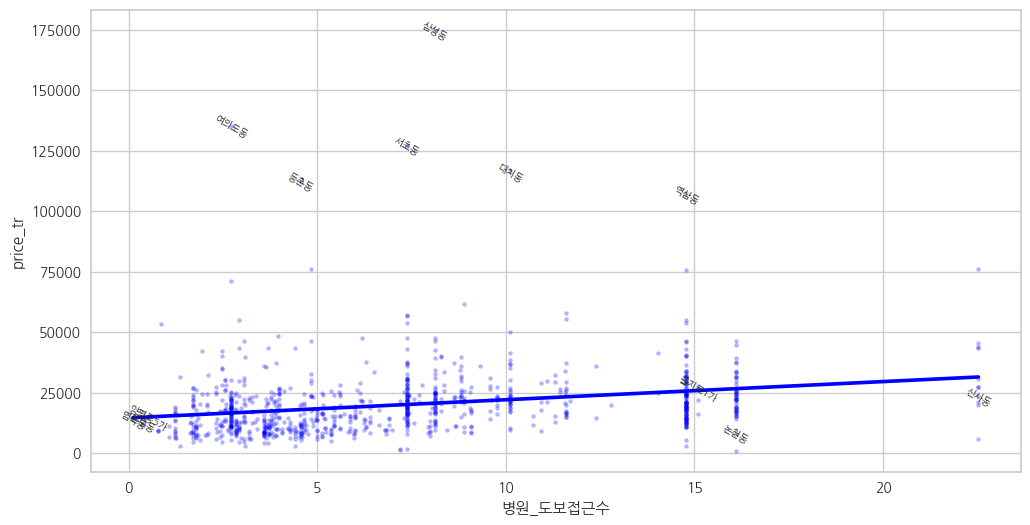

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))
#plt.scatter(train2['병원_도보접근수'], train2['price_tr'], color = 'blue', alpha=0.3, s = 10)
sns.regplot(x = train2['병원_도보접근수'], y = train2['price_tr'], ci =None, scatter_kws={'s':10, 'alpha':0.3}, color='blue')

for i in range(len(train3)): # 행 개수만큼 순회
    row = train3.iloc[i] # 한 행씩 꺼내기
    name = row['add_dong'] # 이름이 저장된 열
    x = row['병원_도보접근수'] # x좌표가 저장된 열
    y = row['price_tr'] # y좌표가 저장된 열

    plt.text(x, y, name, size=7,
        ha='center', va='center',rotation=-30) # x 좌표, y좌표, 이름 순서로 input 지정

plt.xlabel("병원_도보접근수")
plt.ylabel("price_tr")
plt.show()

## 2. 교통_대중교통접근수

In [ ]:
aa = train2.sort_values(by=["교통_대중교통접근수"], axis=0, ascending=False)[["교통_대중교통접근수", "add_dong"]]
aa = aa['add_dong'].unique()
aa

In [ ]:
index = np.concatenate((aa[:3], aa[-5:]), axis=None)
index

array(['종로2가', '서린동', '노량진동', '영등포동6가', '운니동', '상수동', '원남동', '가양동'],
      dtype=object)

In [ ]:
train3 = train2[train2["add_dong"].isin(index)]
train3 = train3[["add_dong", 'price_tr','교통_대중교통접근수']]
train3.drop_duplicates(subset=['add_dong'],inplace=True)
train3

In [ ]:
bb = train2[train2["price_tr"]>100000][["add_dong", "price_tr", "교통_대중교통접근수"]]
bb
train3 = pd.concat([train3, bb])
train3

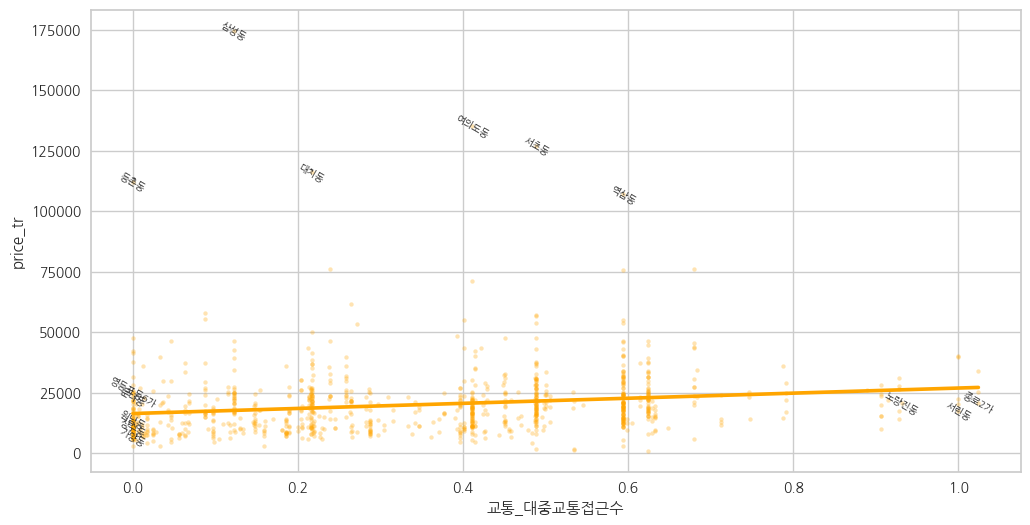

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x = train2['교통_대중교통접근수'], y = train2['price_tr'], ci =None, scatter_kws={'s':10, 'alpha':0.3}, color='orange')

for i in range(len(train3)):
    row = train3.iloc[i]
    name = row['add_dong']
    x = row['교통_대중교통접근수']
    y = row['price_tr']

    plt.text(x, y, name, size=7,
        ha='center', va='center',rotation=-30)

plt.xlabel("교통_대중교통접근수")
plt.ylabel("price_tr")
plt.show()

## 3. 상권업종

In [ ]:
aa = train2.sort_values(by=["상권업종"], axis=0, ascending=False)[["상권업종", "add_dong"]]
aa = aa['add_dong'].unique()
aa

In [ ]:
index = np.concatenate((aa[:3], aa[-5:]), axis=None)
index

array(['역삼동', '서초동', '논현동', '평동', '미근동', '남대문로1가', '충정로1가', '남산동3가'],
      dtype=object)

In [ ]:
train3 = train2[train2["add_dong"].isin(index)]
train3 = train3[["add_dong", 'price_tr','상권업종']]
train3.drop_duplicates(subset=['add_dong'],inplace=True)
train3

In [ ]:
bb = train2[train2["price_tr"]>100000][["add_dong", "price_tr", "상권업종"]]
bb
train3 = pd.concat([train3, bb])
train3

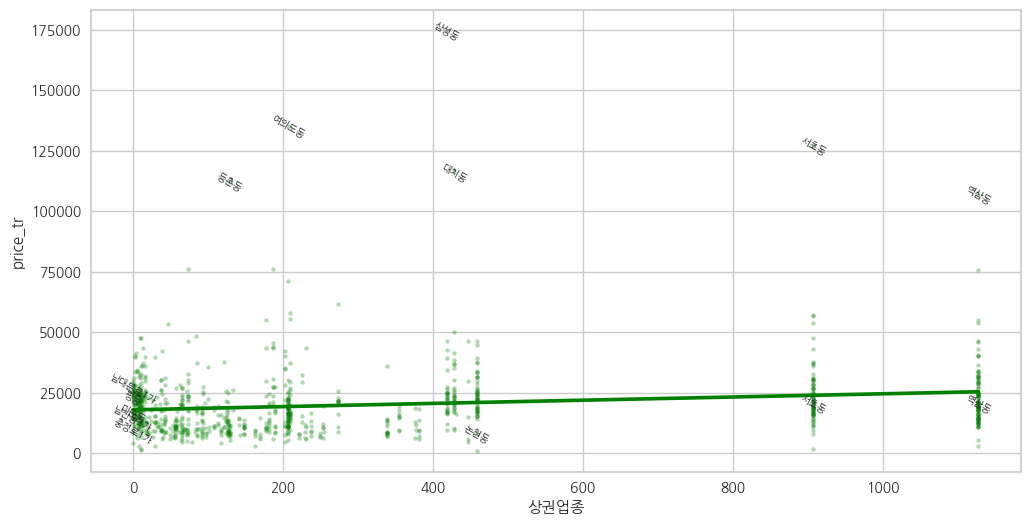

In [ ]:
plt.figure(figsize=(12, 6))
#plt.scatter(train2['상권업종'], train2['price_tr'], color = 'green', alpha = 0.3, s = 10)
sns.regplot(x = train2['상권업종'], y = train2['price_tr'], ci =None, scatter_kws={'s':10, 'alpha':0.3}, color='green')


for i in range(len(train3)):
    row = train3.iloc[i]
    name = row['add_dong']
    x = row['상권업종']
    y = row['price_tr']

    plt.text(x, y, name, size=7,
        ha='center', va='center',rotation=-30)

plt.xlabel("상권업종")
plt.ylabel("price_tr")
plt.show()

## 경제지표(시계열)
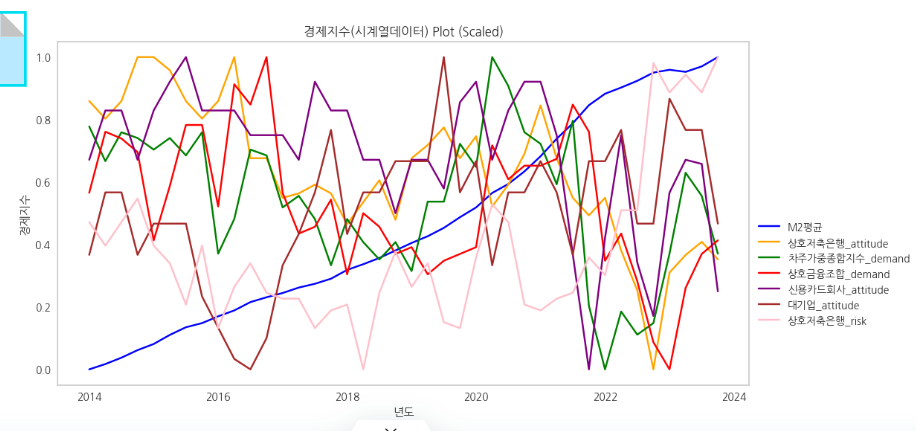


'M2평균', '상호저축은행_attitude', '차주가중종합지수_demand', '상호금융조합_demand', '신용카드회사_attitude', '대기업_attitude', '상호저축은행_risk'

In [ ]:
train2.columns

Index(['gfa_dlt', 'land_area', 'floor_gr', 'floor_bm', 'year_con', '교통_도보접근시간',
       '학교_차량접근시간', '교통_차량접근시간', '학교_대중교통접근시간', '병원_대중교통접근시간', '학교_도보접근수',
       '병원_도보접근수', '교통_도보접근수', '학교_차량접근수', '교통_차량접근수', '교통_대중교통접근수',
       'avg_부동산시장_소비심리지수', '차주가중종합지수_attitude', '대기업_attitude',
       '상호저축은행_attitude', '신용카드회사_attitude', '생명보험회사_attitude',
       '차주가중종합지수_risk', '대기업_risk', '상호저축은행_risk', '신용카드회사_risk',
       '차주가중종합지수_demand', '대기업_demand', '상호저축은행_demand', '신용카드회사_demand',
       '상호금융조합_demand', '생명보험회사_demand', 'avg_경제심리지수', '상권업종', 'M2평균', '증가율평균',
       'dealt_yr', 'dealt_qr', 'add_si', 'add_gu', 'add_dong', 'bld_type',
       'EMD_CD', 'key', 'price_tr', '의료', '성비', '총인구', 'GRDP', 'EMD_ENG_NM',
       'EMD_KOR_NM', 'geometry'],
      dtype='object')

In [ ]:
시계열 = train2[['M2평균', '상호저축은행_attitude', '차주가중종합지수_demand', '상호금융조합_demand', '신용카드회사_attitude', '대기업_attitude', '상호저축은행_risk', 'price_tr']]
시계열

,M2평균,상호저축은행_attitude,차주가중종합지수_demand,상호금융조합_demand,신용카드회사_attitude,대기업_attitude,상호저축은행_risk,price_tr
0,1953.517467,4,26,1,-6,-9,25,14600
1,1953.517467,4,26,1,-6,-9,25,8100
2,1953.517467,4,26,1,-6,-9,25,13900
3,1953.517467,4,26,1,-6,-9,25,10500
4,1953.517467,4,26,1,-6,-9,25,25200
...,...,...,...,...,...,...,...,...
939,3796.088200,-31,18,-13,-6,3,50,26000
940,3796.088200,-31,18,-13,-6,3,50,12300
941,3829.862700,-28,14,-8,-7,3,47,26200
942,3887.655333,-32,4,-6,-38,-6,53,17900


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


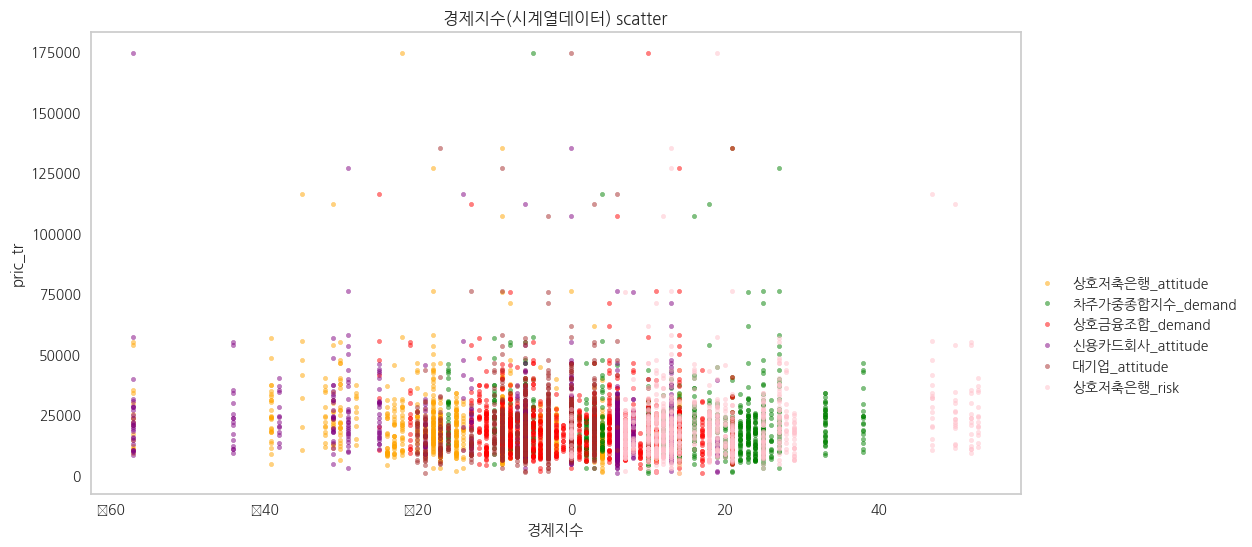

In [ ]:
plt.figure(figsize=(12, 6))

#plt.plot(시계열['price_tr'], 시계열['M2평균'], label='M2평균', color='blue')
plt.scatter(y=시계열['price_tr'], x=시계열['상호저축은행_attitude'], label='상호저축은행_attitude', color='orange', s=10, alpha = 0.5)
plt.scatter(y=시계열['price_tr'], x=시계열['차주가중종합지수_demand'], label='차주가중종합지수_demand', color='green', s=10, alpha = 0.5)
plt.scatter(y=시계열['price_tr'], x=시계열['상호금융조합_demand'], label='상호금융조합_demand', color='red', s=10, alpha = 0.5)
plt.scatter(y=시계열['price_tr'], x=시계열['신용카드회사_attitude'], label='신용카드회사_attitude', color='purple', s=10, alpha = 0.5)
plt.scatter(y=시계열['price_tr'], x=시계열['대기업_attitude'], label='대기업_attitude', color='brown', s=10, alpha = 0.5)
plt.scatter(y=시계열['price_tr'], x=시계열['상호저축은행_risk'], label='상호저축은행_risk', color='pink', s=10, alpha = 0.5)

plt.title('경제지수(시계열데이터) scatter')
plt.xlabel('경제지수')
plt.ylabel('pric_tr')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

<Axes: xlabel='상호저축은행_risk', ylabel='price_tr'>

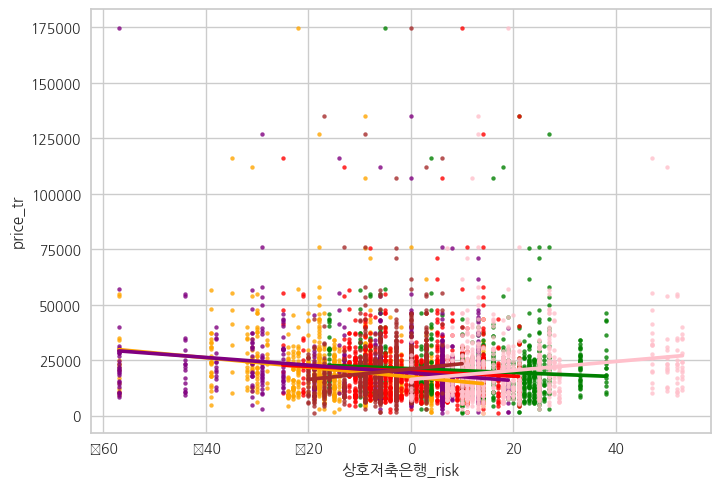

In [ ]:
#plt.figure(figsize=(12, 6))
import seaborn as sns
#plt.plot(시계열['price_tr'], 시계열['M2평균'], label='M2평균', color='blue')
#plt.scatter(y=시계열['price_tr'], x=시계열['상호저축은행_attitude'], label='상호저축은행_attitude', color='orange', s=10, alpha = 0.5)
sns.regplot(x = 시계열['상호저축은행_attitude'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10}, color='orange')
#plt.scatter(y=시계열['price_tr'], x=시계열['차주가중종합지수_demand'], label='차주가중종합지수_demand', color='green', s=10, alpha = 0.5)
sns.regplot(x = 시계열['차주가중종합지수_demand'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10}, color='green')
#plt.scatter(y=시계열['price_tr'], x=시계열['상호금융조합_demand'], label='상호금융조합_demand', color='red', s=10, alpha = 0.5)
sns.regplot(x = 시계열['상호금융조합_demand'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10}, color='red')
#plt.scatter(y=시계열['price_tr'], x=시계열['신용카드회사_attitude'], label='신용카드회사_attitude', color='purple', s=10, alpha = 0.5)
sns.regplot(x = 시계열['신용카드회사_attitude'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10}, color='purple')
#plt.scatter(y=시계열['price_tr'], x=시계열['대기업_attitude'], label='대기업_attitude', color='brown', s=10, alpha = 0.5)
sns.regplot(x = 시계열['대기업_attitude'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10}, color='brown')
#plt.scatter(y=시계열['price_tr'], x=시계열['상호저축은행_risk'], label='상호저축은행_risk', color='pink', s=10, alpha = 0.5)
sns.regplot(x = 시계열['상호저축은행_risk'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10}, color='pink')

#plt.title('경제지수(시계열데이터) scatter')
#plt.xlabel('경제지수')
#plt.ylabel('pric_tr')
#plt.legend(bbox_to_anchor=(1, 0.5))
#plt.grid()
#plt.show()

Text(0.5, 1.0, '경제지표')

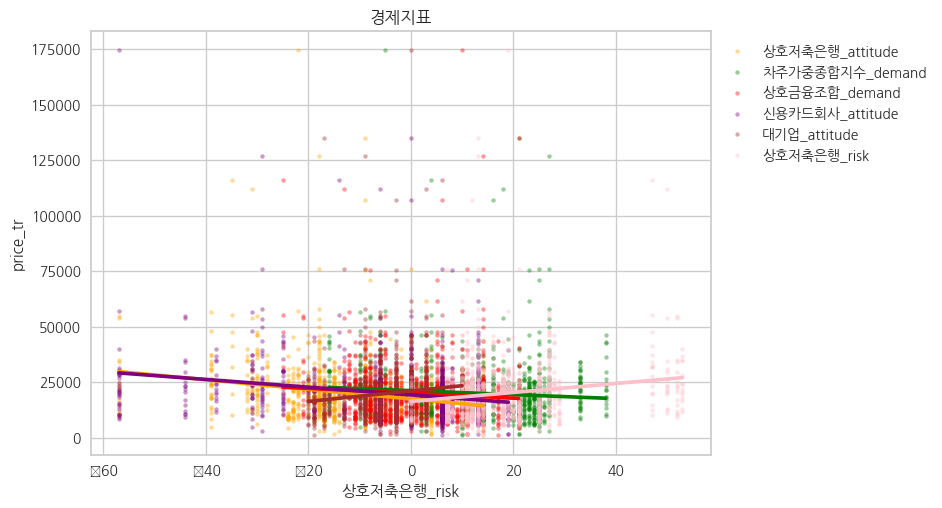

In [ ]:
f, ax = plt.subplots(1, 1)

sns.regplot(x = 시계열['상호저축은행_attitude'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10, 'alpha':0.4}, color='orange', label ='상호저축은행_attitude')
sns.regplot(x = 시계열['차주가중종합지수_demand'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10, 'alpha':0.4}, color='green', label ='차주가중종합지수_demand')
sns.regplot(x = 시계열['상호금융조합_demand'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10, 'alpha':0.4}, color='red', label = '상호금융조합_demand')
sns.regplot(x = 시계열['신용카드회사_attitude'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10, 'alpha':0.4}, color='purple', label ='신용카드회사_attitude')
sns.regplot(x = 시계열['대기업_attitude'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10, 'alpha':0.4}, color='brown', label ='대기업_attitude')
sns.regplot(x = 시계열['상호저축은행_risk'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10, 'alpha':0.4}, color='pink', label = '상호저축은행_risk')

ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("경제지표")

Text(0.5, 1.0, '경제지표(price_tr<100,000)')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


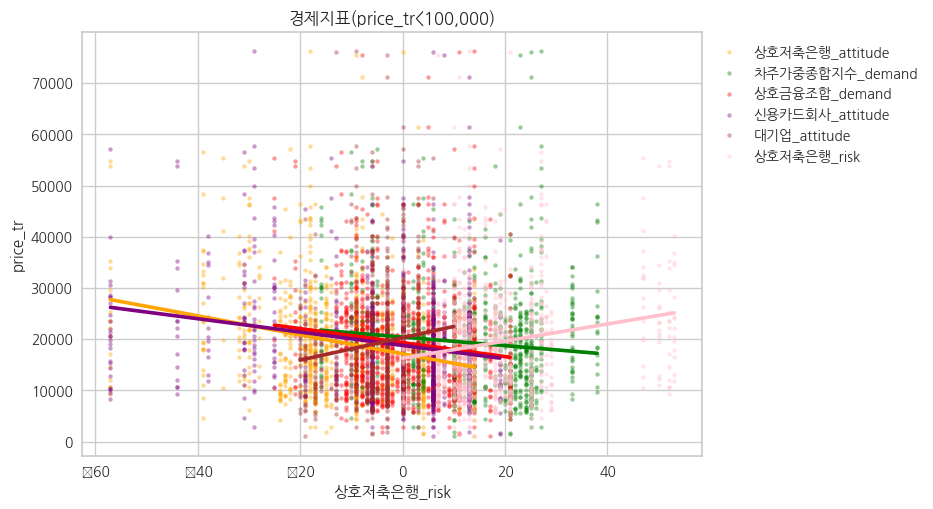

In [ ]:
f, ax = plt.subplots(1, 1)

sns.regplot(x = 시계열2['상호저축은행_attitude'], y = 시계열2['price_tr'], ci =None, scatter_kws={'s':10, 'alpha':0.4}, color='orange', label ='상호저축은행_attitude')
sns.regplot(x = 시계열2['차주가중종합지수_demand'], y = 시계열2['price_tr'], ci =None, scatter_kws={'s':10, 'alpha':0.4}, color='green', label ='차주가중종합지수_demand')
sns.regplot(x = 시계열2['상호금융조합_demand'], y = 시계열2['price_tr'], ci =None, scatter_kws={'s':10, 'alpha':0.4}, color='red', label = '상호금융조합_demand')
sns.regplot(x = 시계열2['신용카드회사_attitude'], y = 시계열2['price_tr'], ci =None, scatter_kws={'s':10, 'alpha':0.4}, color='purple', label ='신용카드회사_attitude')
sns.regplot(x = 시계열2['대기업_attitude'], y = 시계열2['price_tr'], ci =None, scatter_kws={'s':10, 'alpha':0.4}, color='brown', label ='대기업_attitude')
sns.regplot(x = 시계열2['상호저축은행_risk'], y = 시계열2['price_tr'], ci =None, scatter_kws={'s':10, 'alpha':0.4}, color='pink', label = '상호저축은행_risk')

ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("경제지표(price_tr<100,000)")

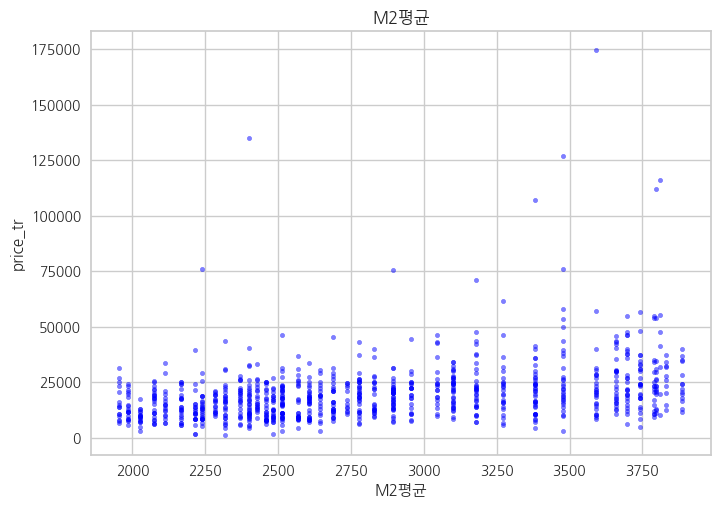

In [ ]:
plt.scatter(y=시계열['price_tr'], x=시계열['M2평균'], label='M2평균', s=10, alpha = 0.5, color='blue')
plt.title('M2평균')
plt.xlabel('M2평균')
plt.ylabel('price_tr')
plt.show()

<Axes: xlabel='M2평균', ylabel='price_tr'>

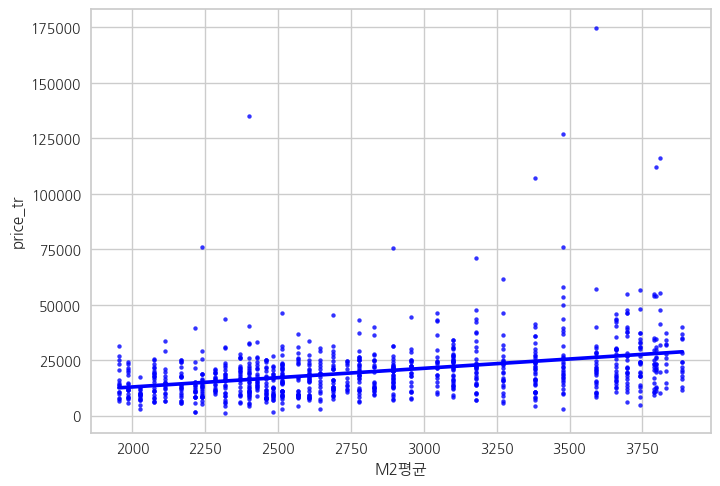

In [ ]:
import seaborn as sns
sns.regplot(x = 시계열['M2평균'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10}, color='blue')

[Text(0.5, 1.0, 'price_tr<10,000')]

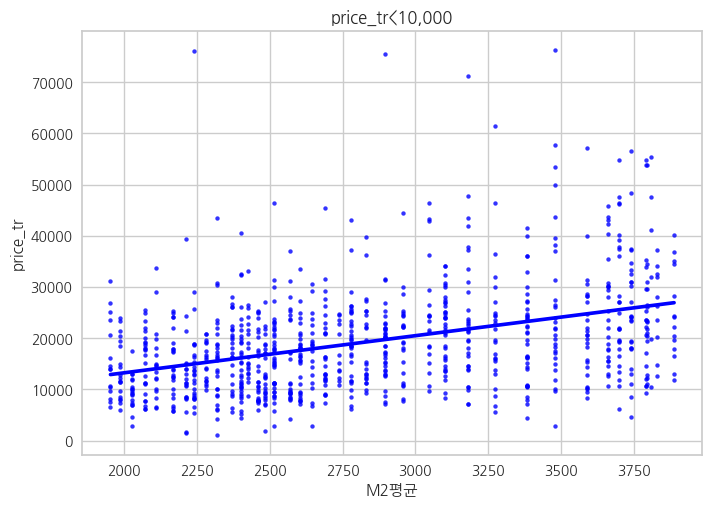

In [ ]:
시계열2 = 시계열[시계열["price_tr"]<=100000]
sns.regplot(x = 시계열2['M2평균'], y = 시계열2['price_tr'], ci =None, scatter_kws={'s':10}, color='blue').set(title='price_tr<10,000')

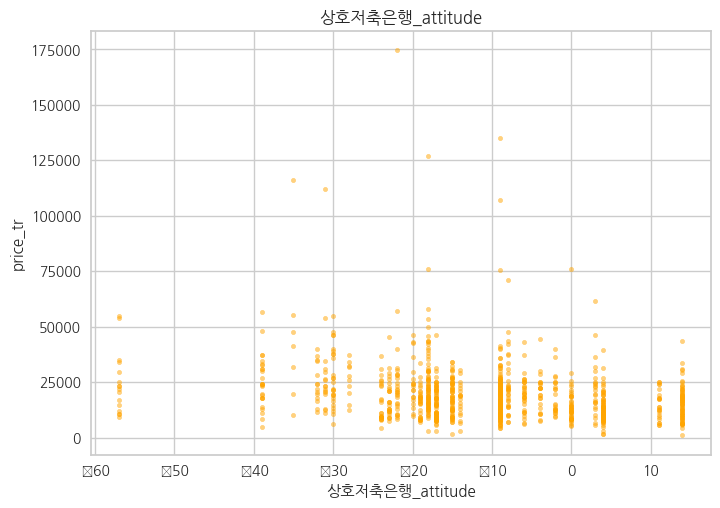

In [ ]:
plt.scatter(y=시계열['price_tr'], x=시계열['상호저축은행_attitude'], label='상호저축은행_attitude', color='orange', s=10, alpha = 0.5)
plt.title('상호저축은행_attitude')
plt.xlabel('상호저축은행_attitude')
plt.ylabel('price_tr')
plt.show()

<Axes: xlabel='상호저축은행_attitude', ylabel='price_tr'>

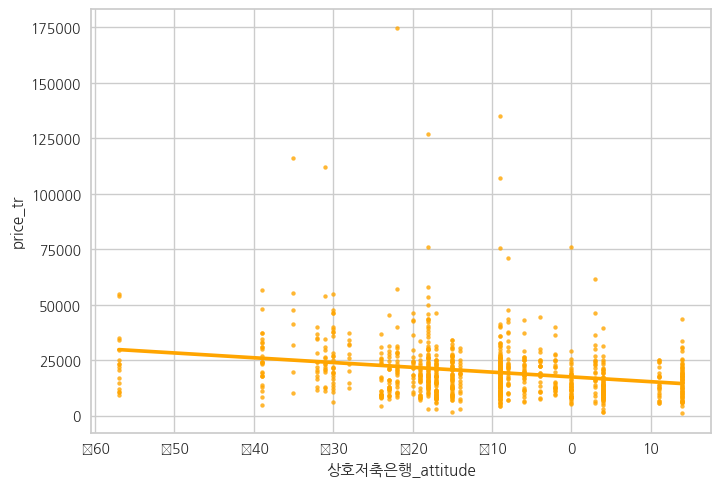

In [ ]:
sns.regplot(x = 시계열['상호저축은행_attitude'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10}, color='orange')

[Text(0.5, 1.0, 'price_tr<10,000')]

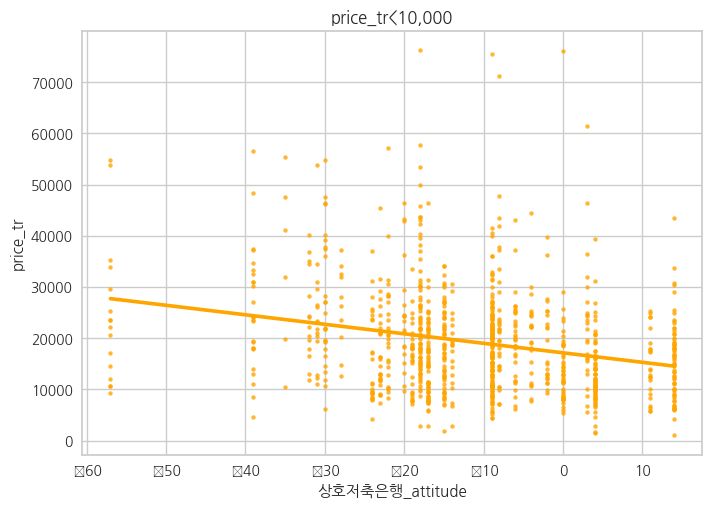

In [ ]:
sns.regplot(x = 시계열2['상호저축은행_attitude'], y = 시계열2['price_tr'], ci =None, scatter_kws={'s':10}, color='orange').set(title='price_tr<10,000')

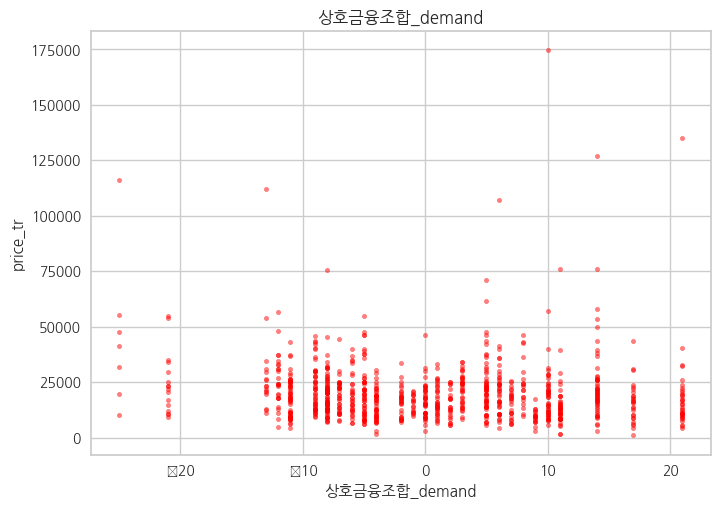

In [ ]:
plt.scatter(y=시계열['price_tr'], x=시계열['상호금융조합_demand'], label='상호금융조합_demand', color='red', s=10, alpha = 0.5)
plt.title('상호금융조합_demand')
plt.xlabel('상호금융조합_demand')
plt.ylabel('price_tr')
plt.show()

<Axes: xlabel='상호금융조합_demand', ylabel='price_tr'>

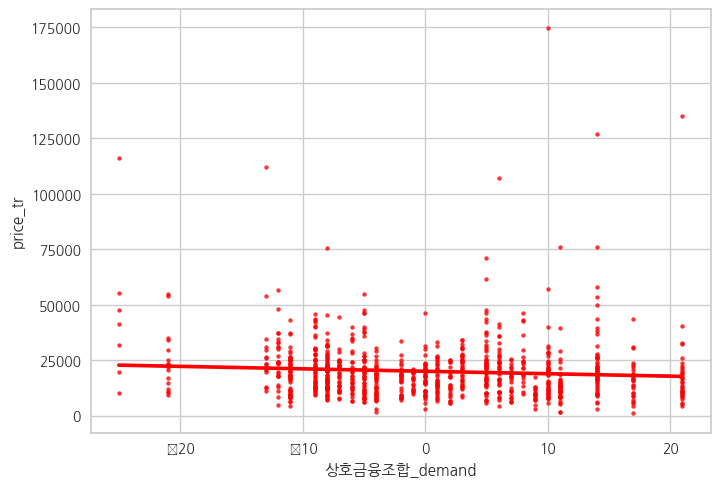

In [ ]:
sns.regplot(x = 시계열['상호금융조합_demand'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10}, color='red')

[Text(0.5, 1.0, 'price_tr<10,000')]

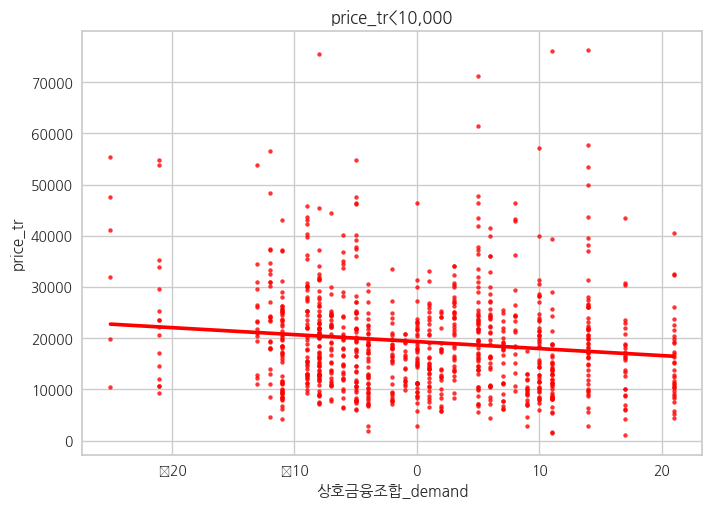

In [ ]:
sns.regplot(x = 시계열2['상호금융조합_demand'], y = 시계열2['price_tr'], ci =None, scatter_kws={'s':10}, color='red').set(title='price_tr<10,000')

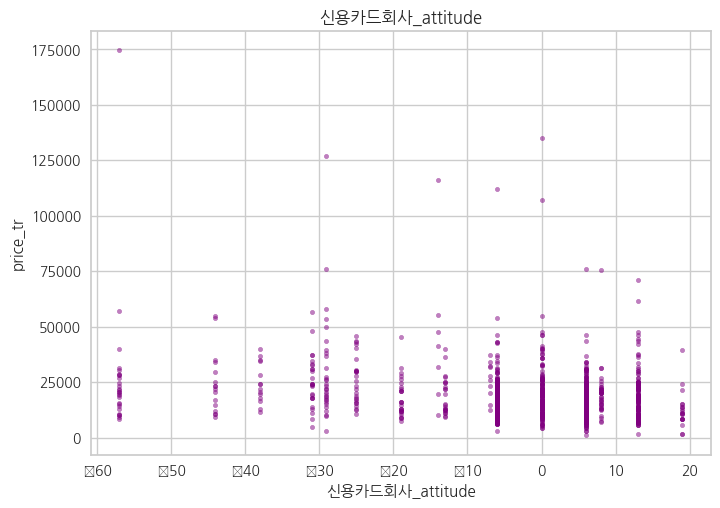

In [ ]:
plt.scatter(y=시계열['price_tr'], x=시계열['신용카드회사_attitude'], label='신용카드회사_attitude', color='purple', s=10, alpha = 0.5)
plt.title('신용카드회사_attitude')
plt.xlabel('신용카드회사_attitude')
plt.ylabel('price_tr')
plt.show()

<Axes: xlabel='신용카드회사_attitude', ylabel='price_tr'>

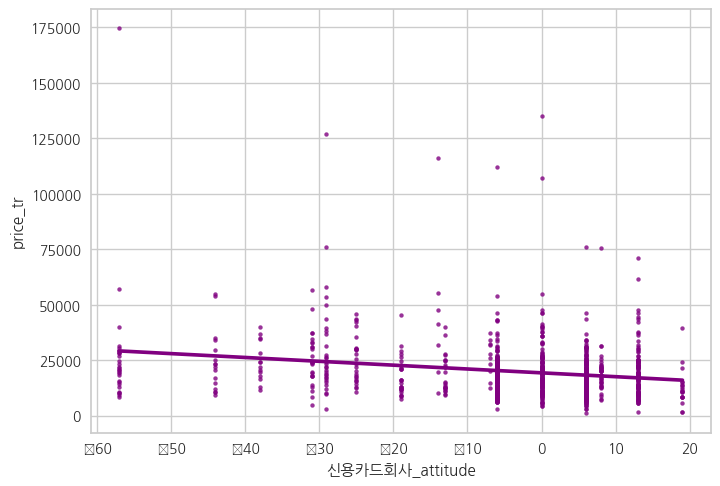

In [ ]:
sns.regplot(x = 시계열['신용카드회사_attitude'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10}, color='purple')

[Text(0.5, 1.0, 'price_tr<10,000')]

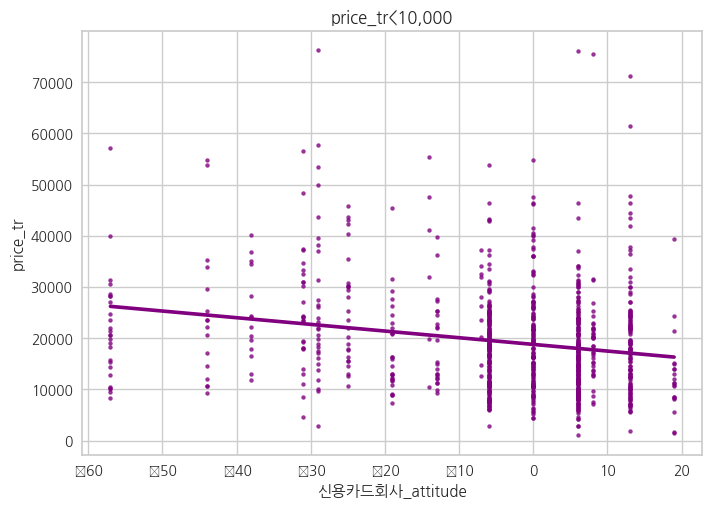

In [ ]:
sns.regplot(x = 시계열2['신용카드회사_attitude'], y = 시계열2['price_tr'], ci =None, scatter_kws={'s':10}, color='purple').set(title='price_tr<10,000')

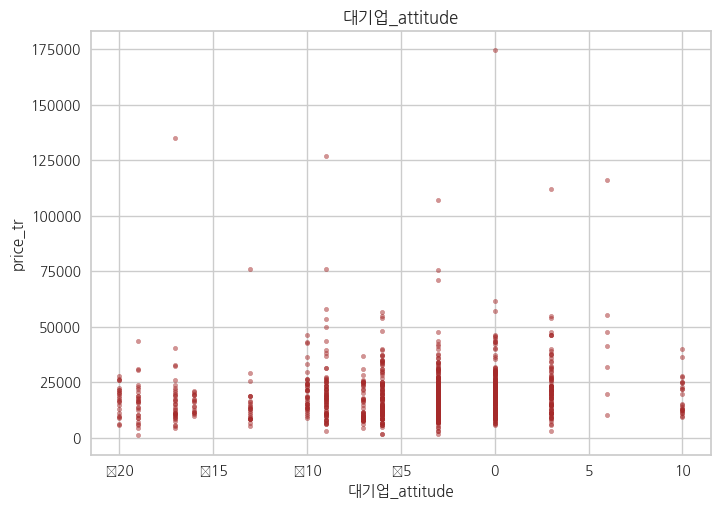

In [ ]:
plt.scatter(y=시계열['price_tr'], x=시계열['대기업_attitude'], label='대기업_attitude', color='brown', s=10, alpha = 0.5)
plt.title('대기업_attitude')
plt.xlabel('대기업_attitude')
plt.ylabel('price_tr')
plt.show()

<Axes: xlabel='대기업_attitude', ylabel='price_tr'>

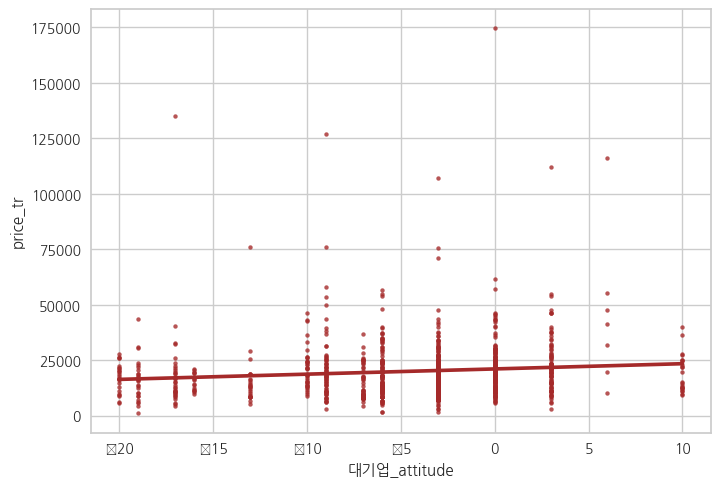

In [ ]:
sns.regplot(x = 시계열['대기업_attitude'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10}, color='brown')

[Text(0.5, 1.0, 'price_tr<10,000')]

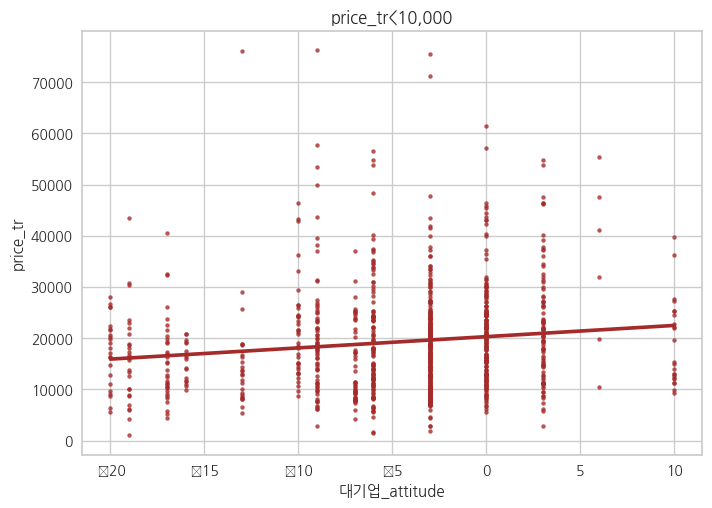

In [ ]:
sns.regplot(x = 시계열2['대기업_attitude'], y = 시계열2['price_tr'], ci =None, scatter_kws={'s':10}, color='brown').set(title='price_tr<10,000')

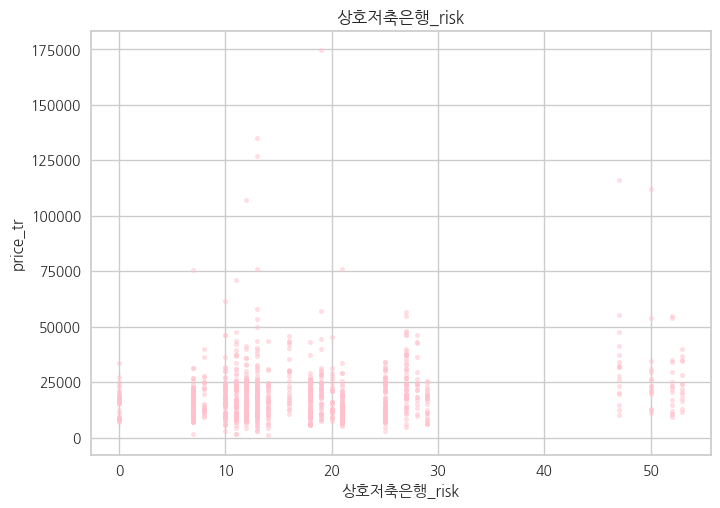

In [ ]:
plt.scatter(y=시계열['price_tr'], x=시계열['상호저축은행_risk'], label='상호저축은행_risk', color='pink', s=10, alpha = 0.5)
plt.title('상호저축은행_risk')
plt.xlabel('상호저축은행_risk')
plt.ylabel('price_tr')
plt.show()

<Axes: xlabel='상호저축은행_risk', ylabel='price_tr'>

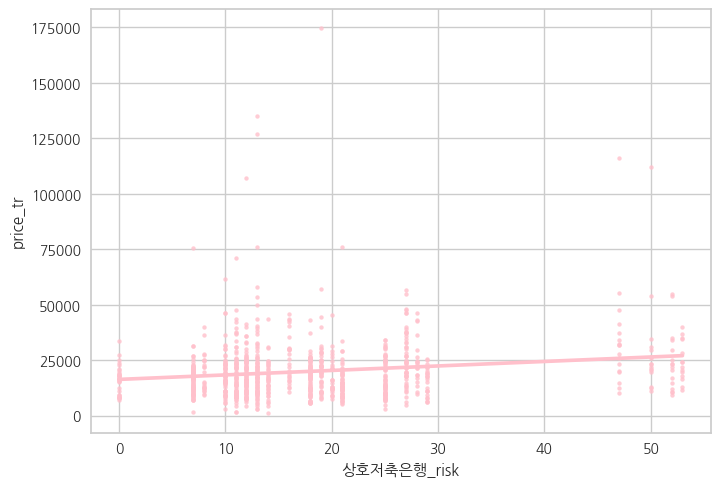

In [ ]:
sns.regplot(x = 시계열['상호저축은행_risk'], y = 시계열['price_tr'], ci =None, scatter_kws={'s':10}, color='pink')

[Text(0.5, 1.0, 'price_tr<10,000')]

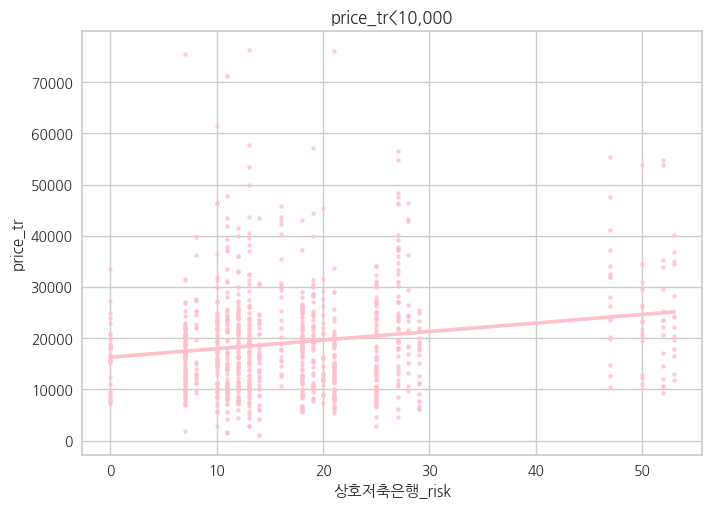

In [ ]:
sns.regplot(x = 시계열2['상호저축은행_risk'], y = 시계열2['price_tr'], ci =None, scatter_kws={'s':10}, color='pink').set(title='price_tr<10,000')

In [ ]:
train2['dealt_qr'].str.replace('Q', '', regex=False)

,dealt_qr
0,1
1,1
2,1
3,1
4,1
...,...
939,2
940,2
941,3
942,4


In [ ]:
train2['time']= (train2["dealt_yr"]-2014) + train2['dealt_qr'].str.replace('Q', '', regex=False).astype(int) * 0.25
시계열['time'] = train2['time'].copy()

<ipython-input-56-61a2b10e26eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  시계열['time'] = train2['time'].copy()


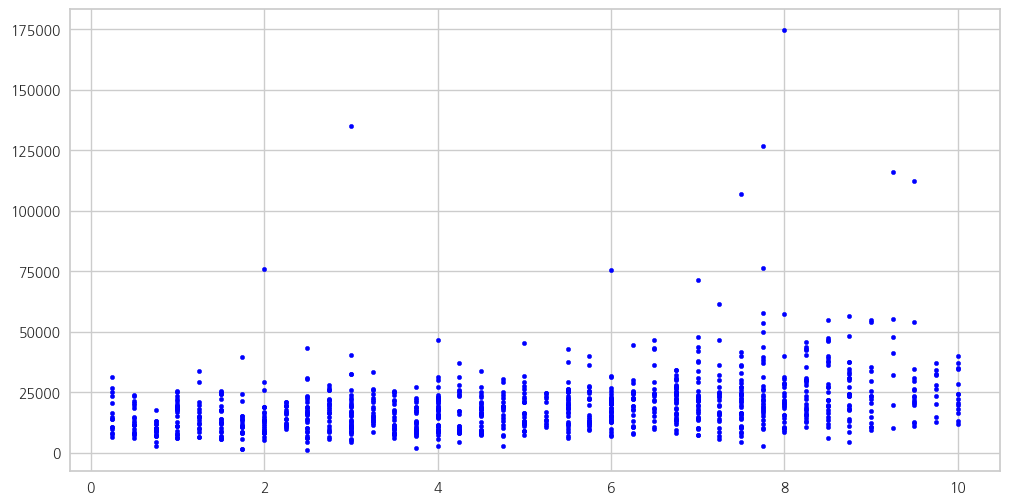

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(시계열['time'], 시계열['price_tr'],label='M2평균', color='blue', s=10)

## 인구지표

### 의료

In [ ]:
aa = train2.sort_values(by=["의료"], axis=0, ascending=False)[["의료", "add_dong"]]
aa = aa['add_dong'].unique()
aa

In [ ]:
index = np.concatenate((aa[:3], aa[-3:]), axis=None)
index

array(['논현동', '대치동', '청담동', '후암동', '초동', '을지로3가'], dtype=object)

In [ ]:
train3 = train2[train2["add_dong"].isin(index)]
train3 = train3[["add_dong", 'price_tr','의료']]
train3.drop_duplicates(subset=['add_dong'],inplace=True)
train3

In [ ]:
bb = train2[train2["price_tr"]>100000][["add_dong", "price_tr", "의료"]]
bb
train3 = pd.concat([train3, bb])
train3

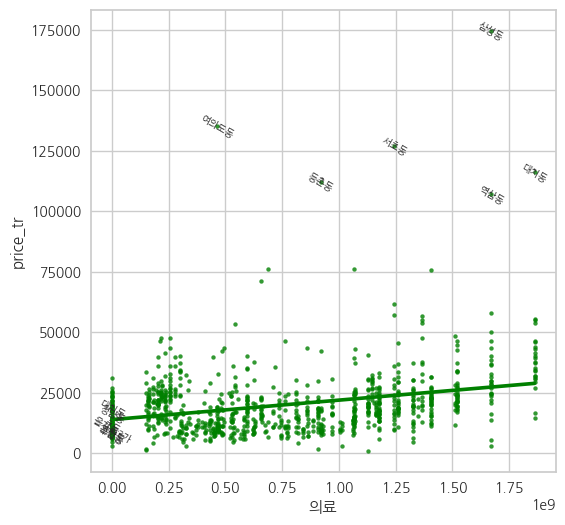

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.regplot(x = train2['의료'], y = train2['price_tr'], ci =None, scatter_kws={'s':10}, color='green')
for i in range(len(train3)):
    row = train3.iloc[i]
    name = row['add_dong']
    x = row['의료']
    y = row['price_tr']

    plt.text(x, y, name, size=7,
        ha='center', va='center',rotation=-30)
plt.xlabel("의료")
plt.ylabel("price_tr")
plt.show()

### GRDP

In [ ]:
aa = train2.sort_values(by=["GRDP"], axis=0, ascending=False)[["GRDP", "add_dong"]]
aa = aa['add_dong'].unique()
aa

In [ ]:
index = np.concatenate((aa[:3], aa[-3:]), axis=None)
index

array(['역삼동', '청담동', '논현동', '번동', '미아동', '수유동'], dtype=object)

In [ ]:
train3 = train2[train2["add_dong"].isin(index)]
train3 = train3[["add_dong", 'price_tr','GRDP']]
train3.drop_duplicates(subset=['add_dong'],inplace=True)
train3

In [ ]:
bb = train2[train2["price_tr"]>100000][["add_dong", "price_tr", "GRDP"]]
bb
train3 = pd.concat([train3, bb])
train3

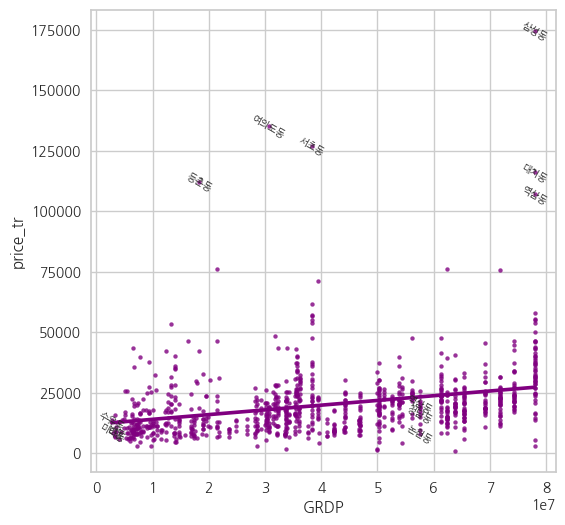

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 6))
#plt.scatter(train2['병원_도보접근수'], train2['price_tr'], color = 'blue', alpha=0.3, s = 10)
sns.regplot(x = train2['GRDP'], y = train2['price_tr'], ci =None, scatter_kws={'s':10}, color='purple')
for i in range(len(train3)):
    row = train3.iloc[i]
    name = row['add_dong']
    x = row['GRDP']
    y = row['price_tr']

    plt.text(x, y, name, size=7,
        ha='center', va='center',rotation=-30)

plt.xlabel("GRDP")
plt.ylabel("price_tr")
plt.show()